In [1]:
using AutomotiveDrivingModels
using AutoScenes
using AutoViz
using NGSIM

INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.5/AutoViz.ji for module AutoViz.
INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.5/AutoScenes.ji for module AutoScenes.


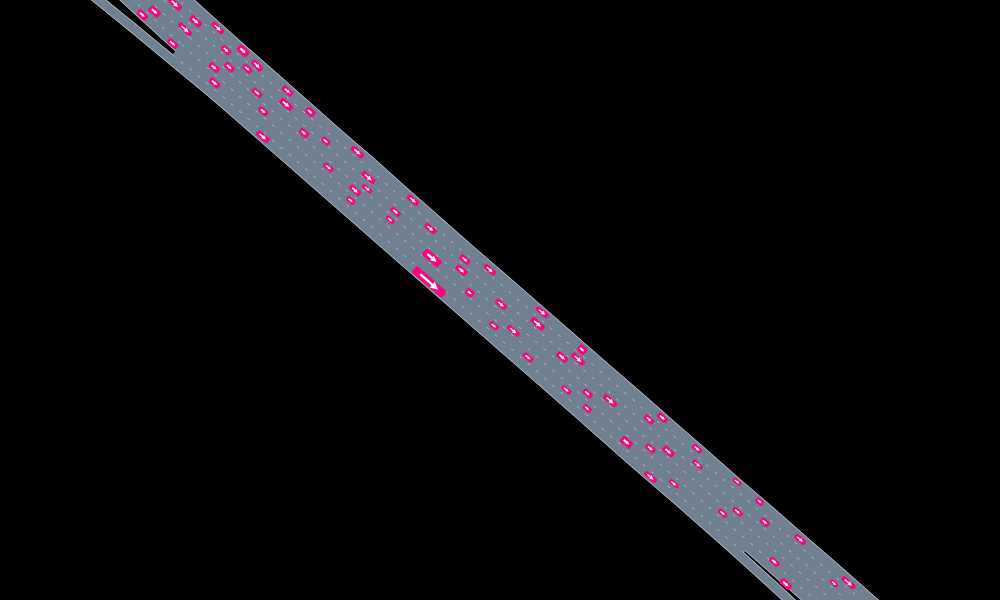

In [13]:
trajdata_id = 1
roadway = get_corresponding_roadway(trajdata_id)
trajdata = load_trajdata(trajdata_id)
scene = get!(Scene(200), trajdata, 4000)
render(scene, roadway)

In [3]:
type RegionOverlay <: AutoViz.SceneOverlay
    region::OBB
    color::Colorant
end
function AutoViz.render!{S,D,I,R}(rendermodel::RenderModel, overlay::RegionOverlay, scene::EntityFrame{S,D,I}, roadway::R)
    obb = overlay.region
    C = obb.aabb.center
    xaxis = polar(obb.aabb.len/2, obb.θ)
    yaxis = polar(obb.aabb.wid/2, obb.θ + π/2)
    pts = [C + xaxis + yaxis, C + xaxis - yaxis, C - xaxis - yaxis, C - xaxis + yaxis]
    add_instruction!(rendermodel, render_closed_line, (pts, overlay.color))
    add_instruction!(rendermodel, render_line_segment, (C, C+xaxis*1.25, colorant"white"))
    return rendermodel
end

In [24]:
# for NGSIM
const REGIONS = Dict{String, OBB}(
    "80_upstream" =>   OBB(VecSE2(1.841849308e6, 650260.64, deg2rad(97)), 100.0, 32.0),
    "80_downstream" => OBB(VecSE2(1841809.308, 650576.64, deg2rad(99)), 100.0, 74.0),
    "80_merge" =>      OBB(VecSE2(1841841.308, 650358.64, deg2rad(98)), 100.0, 74.0),

    "101_upstream" =>  OBB(VecSE2(1966355.000, 570944.00, deg2rad(-44)),100.0,25.0),
    "101_onramp" =>    OBB(VecSE2(1966391.000, 570904.00, deg2rad(-44)),100.0,42.0),
    "101_aux"    =>    OBB(VecSE2(1966479.000, 570824.00, deg2rad(-41)),100.0,42.0),
    "101_offramp" =>   OBB(VecSE2(1966601.000, 570708.00, deg2rad(-41)),100.0,42.0),
    "101_downstream" => OBB(VecSE2(1966665.00, 570668.00, deg2rad(-41)),100.0,25.0),
  )

Dict{String,Vec.OBB} with 8 entries:
  "101_onramp"     => Vec.OBB(Vec.AABB(VecE2(1966391.000, 570904.000),100.0,42.…
  "101_aux"        => Vec.OBB(Vec.AABB(VecE2(1966479.000, 570824.000),100.0,42.…
  "101_offramp"    => Vec.OBB(Vec.AABB(VecE2(1966601.000, 570708.000),100.0,42.…
  "80_upstream"    => Vec.OBB(Vec.AABB(VecE2(1841849.308, 650260.640),100.0,32.…
  "80_downstream"  => Vec.OBB(Vec.AABB(VecE2(1841809.308, 650576.640),100.0,74.…
  "80_merge"       => Vec.OBB(Vec.AABB(VecE2(1841841.308, 650358.640),100.0,74.…
  "101_downstream" => Vec.OBB(Vec.AABB(VecE2(1966665.000, 570668.000),100.0,25.…
  "101_upstream"   => Vec.OBB(Vec.AABB(VecE2(1966355.000, 570944.000),100.0,25.…

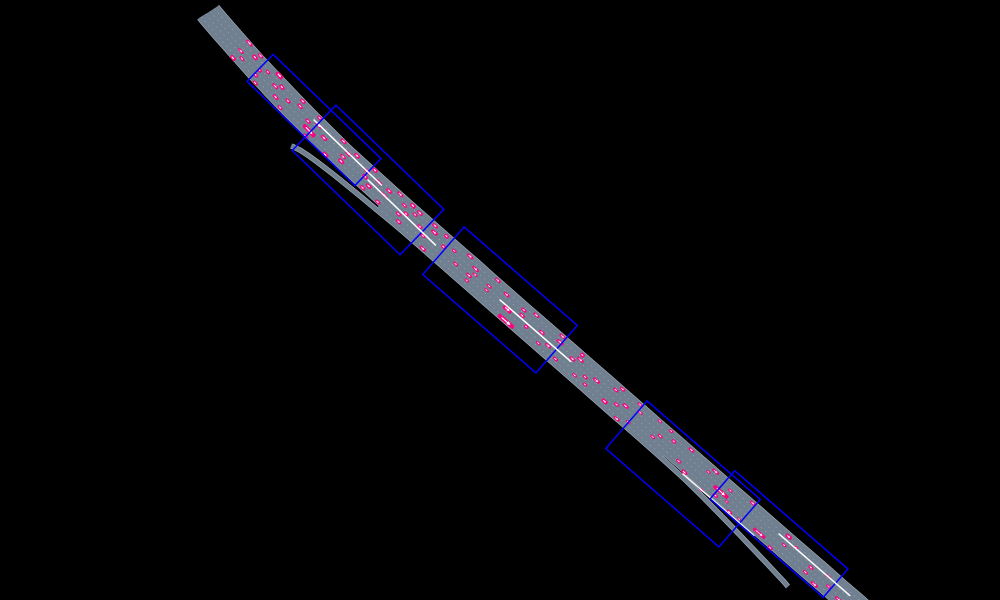

In [27]:
region = REGIONS["101_aux"]
cam = StaticCamera(VecE2(region.aabb.center), 1.5)
render(scene, roadway, [RegionOverlay(REGIONS["101_upstream"], RGB(0.0,0.0,1.0)),
                        RegionOverlay(REGIONS["101_onramp"], RGB(0.0,0.0,1.0)),
                        RegionOverlay(REGIONS["101_aux"], RGB(0.0,0.0,1.0)),
                        RegionOverlay(REGIONS["101_offramp"], RGB(0.0,0.0,1.0)),
                        RegionOverlay(REGIONS["101_downstream"], RGB(0.0,0.0,1.0)),
        ], cam=cam)

Interact.Options{:SelectionSlider,Float64}(input-16: Signal{Float64}(74.0, nactions=1),"wid",74.0,"74.0",Interact.OptionDict(DataStructures.OrderedDict("25.0"=>25.0,"26.0"=>26.0,"27.0"=>27.0,"28.0"=>28.0,"29.0"=>29.0,"30.0"=>30.0,"31.0"=>31.0,"32.0"=>32.0,"33.0"=>33.0,"34.0"=>34.0…),Dict(68.0=>"68.0",124.0=>"124.0",89.0=>"89.0",39.0=>"39.0",46.0=>"46.0",85.0=>"85.0",25.0=>"25.0",55.0=>"55.0",42.0=>"42.0",29.0=>"29.0"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(input-17: Signal{Float64}(1.966393e6, nactions=1),"x",1.966393e6,"1.966393e6",Interact.OptionDict(DataStructures.OrderedDict("1.965895e6"=>1.9659e6,"1.965897e6"=>1.9659e6,"1.965899e6"=>1.9659e6,"1.965901e6"=>1.9659e6,"1.965903e6"=>1.9659e6,"1.965905e6"=>1.96591e6,"1.965907e6"=>1.96591e6,"1.965909e6"=>1.96591e6,"1.965911e6"=>1.96591e6,"1.965913e6"=>1.96591e6…),Dict(1.96668e6=>"1.966683e6",1.96669e6=>"1.966691e6",1.96648e6=>"1.966475e6",1.96606e6=>"1.966063e6",1.96632e6=>"1.966315e6",1.9666e6=>"1.966603e6",1.96676e6=>"1.966761e6",1.96633e6=>"1.966327e6",1.96684e6=>"1.966839e6",1.96688e6=>"1.966879e6"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(input-18: Signal{Float64}(570898.0, nactions=1),"y",570898.0,"570898.0",Interact.OptionDict(DataStructures.OrderedDict("570400.0"=>570400.0,"570402.0"=>570402.0,"570404.0"=>570404.0,"570406.0"=>570406.0,"570408.0"=>570408.0,"570410.0"=>570410.0,"570412.0"=>570412.0,"570414.0"=>570414.0,"570416.0"=>570416.0,"570418.0"=>570418.0…),Dict(570440.0=>"570440.0",570972.0=>"570972.0",570890.0=>"570890.0",570958.0=>"570958.0",570974.0=>"570974.0",570594.0=>"570594.0",570552.0=>"570552.0",571258.0=>"571258.0",570802.0=>"570802.0",570818.0=>"570818.0"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(input-19: Signal{Float64}(-1.0, nactions=1),"θ",-1.0,"-1.0",Interact.OptionDict(DataStructures.OrderedDict("-360.0"=>-360.0,"-359.0"=>-359.0,"-358.0"=>-358.0,"-357.0"=>-357.0,"-356.0"=>-356.0,"-355.0"=>-355.0,"-354.0"=>-354.0,"-353.0"=>-353.0,"-352.0"=>-352.0,"-351.0"=>-351.0…),Dict(306.0=>"306.0",-74.0=>"-74.0",-56.0=>"-56.0",29.0=>"29.0",-105.0=>"-105.0",-263.0=>"-263.0",74.0=>"74.0",176.0=>"176.0",285.0=>"285.0",-137.0=>"-137.0"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(input-20: Signal{Float64}(-0.55, nactions=1),"zoom",-0.55,"-0.55",Interact.OptionDict(DataStructures.OrderedDict("-3.0"=>-3.0,"-2.95"=>-2.95,"-2.9"=>-2.9,"-2.85"=>-2.85,"-2.8"=>-2.8,"-2.75"=>-2.75,"-2.7"=>-2.7,"-2.65"=>-2.65,"-2.6"=>-2.6,"-2.55"=>-2.55…),Dict(1.2=>"1.2",-2.3=>"-2.3",-0.45=>"-0.45",2.0=>"2.0",1.5=>"1.5",-1.3=>"-1.3",1.45=>"1.45",0.35=>"0.35",1.4=>"1.4",-2.2=>"-2.2"…)),Any[],Any[],true,"horizontal")

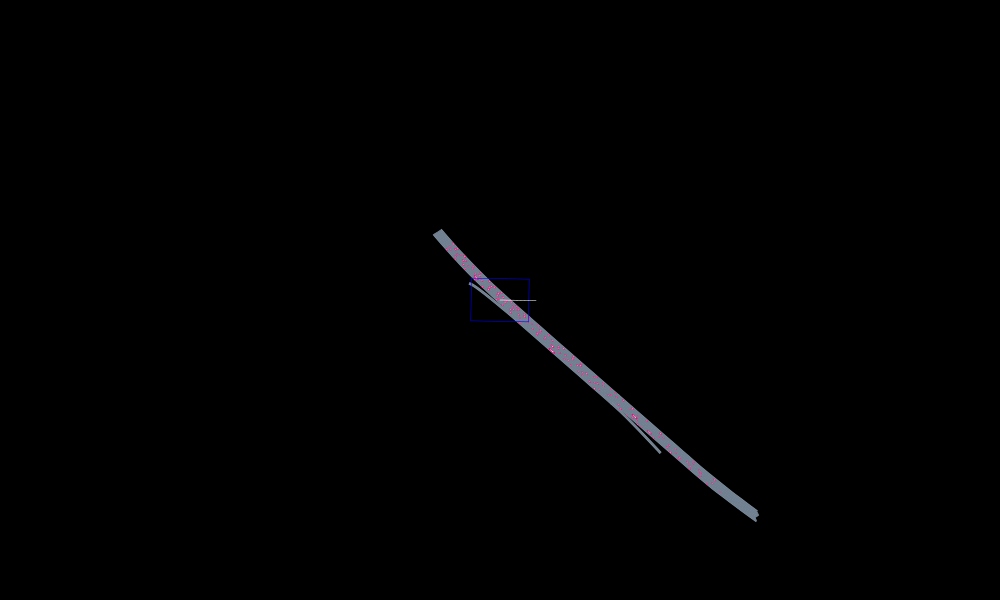

In [15]:
using Interact
x0 = region.aabb.center.x
y0 = region.aabb.center.y
@manipulate for wid in linspace(25.0,125.0,101),
                x in linspace(x0-500.0, x0+500.0, 501),
                y in linspace(y0-500.0, y0+500.0, 501),
                θ in linspace(-360.0, 360.0, 360*2+1),
                zoom in linspace(-3.0, 2.0, 101)
    global region = OBB(VecSE2(x, y, deg2rad(θ)), 100.0, wid)
    overlays = SceneOverlay[RegionOverlay(region, colorant"blue")]
    render(scene, roadway, overlays, cam=StaticCamera(VecE2(region.aabb.center), exp(zoom)))
end

In [3]:
# structure = gen_scene_structure(scene, trajdata.roadway, create_shared_factors())
# overlays = SceneOverlay[Overwash(RGBA(1.0,1.0,1.0,0.7)), SceneStructureOverlay(structure)]
# render(scene, trajdata.roadway, overlays, cam=SceneFollowCamera(4.0))

In [5]:
# overlays = SceneOverlay[SubSceneExtractParamsOverlay(REGIONS["80A"])]
# render(scene, trajdata.roadway, overlays, cam=SceneFollowCamera(1.0))

In [6]:
# using Interact

# # x0 = 1966600.0 # 101
# # y0 = 570700.0

# x0 = 1841794.208 # 80
# y0 = 650650.640
# @manipulate for width in linspace(25.0,125.0,101),
#                 x in linspace(x0-500.0, x0+500.0, 201),
#                 y in linspace(y0-500.0, y0+500.0, 201),
#                 angle in linspace(-360.0, 360.0, 360*2+1),
#                 zoom in linspace(-3.0, 2.0, 101)
#     region = SubSceneExtractParams(VecSE2(x,  y, deg2rad(angle)), 100.0, width)
#     overlays = SceneOverlay[SubSceneExtractParamsOverlay(region)]
#     render(scene, trajdata.roadway, overlays, cam=StaticCamera(convert(VecE2, region.center), exp(zoom)))
# end

In [8]:
factors = create_shared_factors()
dset = SceneStructureDataset(factors)

for trajdata_index in 1 : 6
    trajdata = load_trajdata(trajdata_index)
    frames = 1:40:nframes(trajdata)
    if startswith(splitdir(NGSIM.TRAJDATA_PATHS[trajdata_index])[2], "trajdata_i101")
        append!(dset, pull_scene_dataset(trajdata, REGIONS["101A"], frames=frames))
        append!(dset, pull_scene_dataset(trajdata, REGIONS["101B"], frames=frames))
    else
        append!(dset, pull_scene_dataset(trajdata, REGIONS["80A"], frames=frames))
        append!(dset, pull_scene_dataset(trajdata, REGIONS["80B"], frames=frames))
    end
end

length(dset)

1371

In [9]:
dat = PseudolikelihoodPrealloc(50);

In [10]:
# tic()
# calc_pseudolikelihood(dset, dat=dat)
# toc()

In [11]:
params = GradientStepParams(BatchSampler(dset))
params.grad_params.n_samples_monte_carlo_integration = 5
params.grad_params.n_samples_monte_carlo_pseudolikelihood = 5

learning_rate = 0.01
batch_size = 2
t_start = now()

iter = 0
while iter < typemax(Int)
    iter += 1
    
    params.learning_rate = learning_rate
    params.batch_size = batch_size
    parallel_step!(params)
    
    println("iter: ", iter)
    println("time: ", now() - t_start)
    if mod(iter, 5) == 1
        println("plogl: ", calc_pseudolikelihood(dset, dat=dat, scene=params.grad_params.scene, rec=params.grad_params.rec))
    end
    println("learning rate: ", learning_rate)
    println("batch_size:    ", batch_size)
    println("n_samples:     ", )
    println("weights: ")
    for ϕ in dset.factors
        println(ϕ.template.form, "  ", ϕ.weights)
    end
    println("")
    
    learning_rate *= 0.95
    batch_size += 1
end

iter: 1
time: 15103 milliseconds
plogl: 0.0
learning rate: 0.01
batch_size:    2
n_samples:     
weights: 
1  [-4.43216,-8.0,-8.0,-7.23949,-0.814754,1.0,-2.9099,0.811337,-0.204178,-3.30324,-7.76048,1.0,0.151251,0.313214,0.54468,-8.0,0.952374,1.0,1.0]
2  [-0.102183,-8.0,-5.22692,-0.077776,0.015017,1.0,-3.76083,0.441685,0.196299]
3  [-0.1333,0.436469,0.780003,0.363001,1.0]

iter: 2
time: 314987 milliseconds
learning rate: 0.0095
batch_size:    3
n_samples:     
weights: 
1  [-4.60133,-8.0,-8.0,-7.23467,-1.80863,1.0,-2.93478,1.0,-0.196604,-0.644106,-7.31528,1.0,0.108529,0.111201,0.577662,-8.0,0.721938,1.0,1.0]
2  [0.120515,-8.0,-5.19422,-0.10438,-0.0404975,1.0,-3.75742,0.492269,-0.38341]
3  [0.0414125,0.585011,0.770543,0.209614,1.0]



LoadError: LoadError: InterruptException:
 in evaluate(::AutoScenes.GraphFeatureTemplate, ::AutoScenes.GraphFeatureInstance) at /home/tim/.julia/v0.5/AutoScenes/src/features/core.jl:72
 in evaluate_dot(::AutoScenes.SharedFactor) at /home/tim/.julia/v0.5/AutoScenes/src/factors.jl:29
 in evaluate_dot!(::AutoScenes.SceneStructure, ::Array{AutoScenes.SharedFactor,1}, ::AutomotiveDrivingModels.AutoCore.Scene, ::AutomotiveDrivingModels.AutoCore.Roadway, ::AutomotiveDrivingModels.AutoCore.SceneRecord) at /home/tim/.julia/v0.5/AutoScenes/src/scene_structures.jl:92
 in calc_pseudolikelihood_gradient_component_ϕ(::AutoScenes.SharedFactor, ::Array{AutoScenes.SharedFactor,1}, ::AutomotiveDrivingModels.AutoCore.Scene, ::AutoScenes.SceneStructure, ::AutomotiveDrivingModels.AutoCore.Roadway, ::Int64, ::Array{Int64,1}, ::AutoScenes.GraphFeatureInstance, ::Int64, ::MersenneTwister, ::AutomotiveDrivingModels.AutoCore.SceneRecord) at /home/tim/.julia/v0.5/AutoScenes/src/learning.jl:572
 in calc_pseudolikelihood_gradient(::Int64, ::Int64, ::Array{AutoScenes.SharedFactor,1}, ::Array{AutoScenes.SceneStructureRoadway,1}, ::Int64, ::Float64, ::MersenneTwister, ::AutomotiveDrivingModels.AutoCore.Scene, ::AutomotiveDrivingModels.AutoCore.SceneRecord) at /home/tim/.julia/v0.5/AutoScenes/src/learning.jl:752
 in calc_pseudolikelihood_gradient(::Int64, ::Int64, ::Array{AutoScenes.SharedFactor,1}, ::Array{AutoScenes.SceneStructureRoadway,1}, ::Int64, ::Float64) at /home/tim/.julia/v0.5/AutoScenes/src/learning.jl:715
 in (::AutoScenes.##16#17{AutoScenes.GradientStepParams,AutoScenes.SceneStructureDataset})(::Int64) at /home/tim/.julia/v0.5/AutoScenes/src/stochastic_gradient_ascent_params.jl:203
 in macro expansion at ./asyncmap.jl:63 [inlined]
 in (::Base.##755#757{Base.AsyncCollector,Base.AsyncCollectorState})() at ./task.jl:360
while loading In[11], in expression starting on line 10

In [41]:
params = GradientStepParams(BatchSampler(dset))
params.grad_params.n_samples_monte_carlo_integration = 50
params.grad_params.n_samples_monte_carlo_pseudolikelihood = 50

learning_rate = 0.01
batch_size = 10
t_start = now()

iter = 0
while iter < typemax(Int)
    iter += 1
    
    params.learning_rate = learning_rate
    params.batch_size = batch_size
    step!(params)
    
    println("iter: ", iter)
    println("time: ", now() - t_start)
    if mod(iter, 5) == 1
        println("plogl: ", calc_pseudolikelihood(dset, dat=dat, scene=params.grad_params.scene, rec=params.grad_params.rec))
    end
    println("learning rate: ", learning_rate)
    println("batch_size:    ", batch_size)
    println("n_samples:     ", )
    println("weights: ")
    for ϕ in dset.factors
        println(ϕ.template.form, "  ", ϕ.weights)
    end
    println("")
    
    learning_rate *= 0.95
    batch_size += 1
end

1:   -0.009     0.001    -0.016     0.002    -0.003     0.000     0.004     0.000     0.002    -0.000    -0.010    -0.001    -0.003    -0.000    -0.001     0.000     0.001     0.000     0.041     0.002     0.024    -0.000    -0.019     0.001    -0.004    -0.004    -0.002    -0.001     0.002     0.000    -0.013     0.000    -0.001    -0.001     0.004    -0.000     0.005    -0.000  
2:    0.001    -0.012     0.002    -0.004    -0.000     0.003    -0.003     0.018    -0.018  
3: 
iter: 1
time: 290000 milliseconds
plogl: -100.54216178207922
learning rate: 0.01
batch_size:    10
n_samples:     
weights: 
1  [0.9914529423768134,0.8250582472158212,-8.0,-7.998202756579285,-0.0034957612130915305,1.0,-6.697781883159157,0.001245710218970501,1.0,0.08219980934165173,0.9899835087253473,-1.9751055749553639,-2.180796680281114,-0.01534772506639652,0.9992159966308126,0.028897966976149044,-0.5259337933526155,-0.0003404079371402058,-4.177403652066115,0.07270230214360382,-7.976462863421564,0.43311652631113

LoadError: LoadError: InterruptException:
while loading In[41], in expression starting on line 10

# Learned Marginal Distribution

In [15]:
# using PGFPlots

# g = GroupPlot(1, 3, groupStyle = "vertical sep = 1cm")
# push!(g, Plots.Linear(collect(1:10), randn(10)))
# push!(g, Plots.Linear(collect(1:10), randn(10)))
# push!(g, Plots.Linear(collect(1:10), randn(10)))
# g

! LaTeX Error: File `luatex85.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
   
l.2 \documentclass
                [tikz]{standalone}
End of file on the terminal!



Here is how much of LuaTeX's memory you used:
 11 strings out of 494693
 100000,89155 words of node,token memory allocated 188 words of node memory still in use:
   31 glue_spec, 1 dir nodes
   avail lists: 2:12,3:1
 3851 multiletter control sequences out of 65536+600000
 14 fonts using 562767 bytes
 10i,0n,7p,45b,8s stack positions out of 5000i,500n,10000p,200000b,100000s
!  ==> Fatal error occurred, no output PDF file produced!

Error saving as SVG


ErrorException: LaTeX error

In [16]:
# using PGFPlots

# function _cycle_linear_plot!(xarr::Vector{Float64}, yarr::Vector{Float64})
#     append!(yarr, [0.0, 0.0, yarr[1]])
#     append!(xarr, [xarr[end], xarr[1], xarr[1]])
#     nothing
# end
# function plot_marginal_roadfactor(ϕ_road::SharedFactor;
#     nbins_v::Int = 101,
#     nbins_t::Int = 101,
#     nbins_ϕ::Int = 101,
#     )

#     pts_v = collect(linspace(AutoScenes.BOUNDS_V[1], AutoScenes.BOUNDS_V[2], nbins_v))
#     pts_t = collect(linspace(-3.0, 3.0, nbins_t))
#     pts_ϕ = collect(linspace(AutoScenes.BOUNDS_ϕ[1], AutoScenes.BOUNDS_ϕ[2], nbins_ϕ))
#     v_values = zeros(Float64, nbins_v)
#     t_values = zeros(Float64, nbins_t)
#     ϕ_values = zeros(Float64, nbins_ϕ)
#     tot = 0.0

#     for (j,t) in enumerate(pts_t)
#         AutoScenes._set_and_standardize!(ϕ_road.template, t, 1)
#         for (i,v) in enumerate(pts_v)
#             AutoScenes._set_and_standardize!(ϕ_road.template, v, 2)
#             for (k,ϕ) in enumerate(pts_ϕ)
#                 AutoScenes._set_and_standardize!(ϕ_road.template, ϕ, 3)
                
#                 e = evaluate_dot(ϕ_road)
#                 v_values[i] += e
#                 t_values[j] += e
#                 ϕ_values[k] += e
#                 tot += e
#             end
#         end
#     end

#     # produce a probability density
#     v_values ./= tot
#     t_values ./= tot
#     ϕ_values ./= tot

#     plot_width = "20cm"
#     plot_height = "4cm"
#     style = "solid, thick, mark=none, black"

#     _cycle_linear_plot!(pts_v, v_values)
#     _cycle_linear_plot!(pts_t, t_values)
#     _cycle_linear_plot!(pts_ϕ, ϕ_values)

#     g = GroupPlot(1, 3, groupStyle = "vertical sep = 1cm")
#     push!(g, Axis(PGFPlots.Plots.Linear(pts_v, v_values, style=style*", fill=monokai3"), xlabel="speed [ft/s]", ylabel="pdf", width=plot_width, height=plot_height, enlargelimits="false"))
#     push!(g, Axis(PGFPlots.Plots.Linear(pts_t, t_values, style=style*", fill=monokai4"), xlabel="lane centerline offset [ft]", ylabel="pdf", width=plot_width, height=plot_height, enlargelimits="false"))
#     push!(g, Axis(PGFPlots.Plots.Linear(rad2deg(pts_ϕ), ϕ_values, style=style*", fill=monokai5"), xlabel="lane-relative heading [deg]", ylabel="pdf", width=plot_width, height=plot_height, enlargelimits="false"))
#     g
# end

# plot_marginal_roadfactor(dset.factors[1])

[0.009587413726315342,0.009583849385465516,0.009580583101230939,0.00957761487361168,0.00957494470260762,0.00957257258821884,0.009570498530445237,0.009568722529287057,0.009567244584744047,0.009566064696816218,0.009565182865503886,0.00956459909080668,0.009564313372724719,0.009564325711258008,0.009564636106406564,0.009565244558170463,0.009566151066549637,0.009567355631543973,0.009568858253153635,0.009570658931378593,0.009572757666218722,0.009575154457674128,0.009577849305744927,0.0095808422104309,0.009584133171732174,0.00958772218964863,0.009591609264180387,0.009595794395327446,0.009600277583089744,0.009605058827467278,0.009610138128460125,0.009615515486068248,0.00962119090029157,0.009627164371130285,0.009633435898584067,0.009640005482653325,0.009646873123337672,0.009654038820637399,0.009661502574552326,0.009669264385082544,0.009677324252228064,0.009685682175988789,0.0096943381563648,0.009703292193355962,0.009712544286962561,0.009722094437184307,0.009731942644021494,0.009742088907473762,0

ErrorException: LaTeX error